# CS 414: Artificial Intelligence: KNN Assignment

### CS - 4101

> BE SURE TO HAVE **pandas** and **matplotlib** installed.

---

##### Leader:

- Magbojos, Jenloke

##### Members:

- Abanilla, Drexler
- Cruzat, Seth Arkin
- De Guzman, Joshua John
- De Jesus, James Moris
- Jalapan, John Pol
- Mendoza, Kate Trixie
- Pablo, Rianne Joy

In [1418]:
# Importing Libraries

import pandas as pd # For Features, Data Cleaning & Data Handling
import matplotlib as plt # For Plotting
from matplotlib.colors import ListedColormap # For Legends

import math # Calculating Euclidean Distance

from collections import Counter # Calculating Most Occurring Value in a List of Values

In [1419]:
irrigation_table = pd.read_csv('Modified_Irrigation.csv') # Reading of csv data

print('The length of the dataframe is', len(irrigation_table.index))
irrigation_table.head() # Displays Irrigation CSV in a Readable Table

The length of the dataframe is 200


,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1


In [1420]:
irrigation_table = irrigation_table.drop('crop', axis=1) # Modify the irrigation dataframe to drop crop column/feature since it is not relevant to KNN
irrigation_table.head()

,moisture,temp,pump
0,638,16,1
1,522,18,1
2,741,22,1
3,798,32,1
4,690,28,1


In [1421]:
# Technically Unnecessary since while assessing the CSV it does not contain empty values based on the group's assessment
irrigation_table.dropna()
print('The length of the dataframe is', len(irrigation_table.index)) # that's why the length of the dataframe is still the same

The length of the dataframe is 200


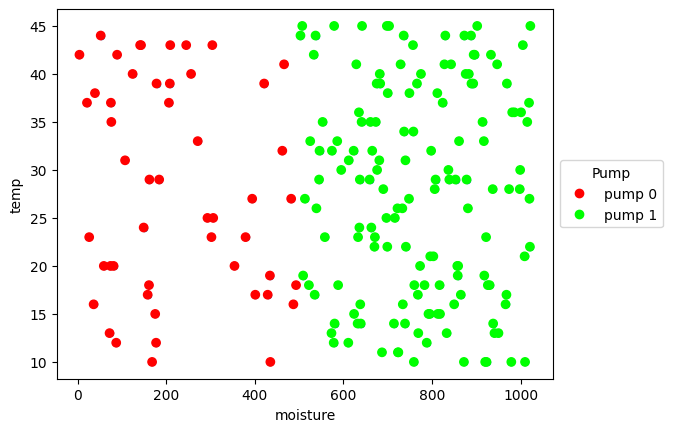

In [1422]:
# Plots the irrigation table data frame
irrigation_table.plot.scatter(x='moisture', y='temp')

# Plots the datapoints with corresponding color based on their classification
cmap = ListedColormap([[1,0,0], [0,1,0]])
scatplot = plt.pyplot.scatter(irrigation_table.moisture, irrigation_table.temp, c=irrigation_table.pump, cmap=cmap)

# Add Plot Legend for the two different classifications
sp_names = ['pump 0', 'pump 1']
plt.pyplot.legend(handles=scatplot.legend_elements()[0], labels=sp_names, title="Pump", loc='center left', bbox_to_anchor=(1.0, 0.5))

In [1423]:
# Splitting the data frame into a 7:3 ratio, where 7 is 70 percent of 200 which is 140 becomes training data for KNN and the remaining 30 percent (60 rows) acts as the test data for the KNN Algorithm 
irrigation_table_70_train = irrigation_table.sample(frac= 0.7) # Training Dataframe
irrigation_table_30_test = irrigation_table.drop(irrigation_table_70_train.index) # Testing Dataframe

print(f'Train Data: {len(irrigation_table_70_train)} rows')
print(f'Test Data: {len(irrigation_table_30_test)} rows')

Train Data: 140 rows
Test Data: 60 rows


In [1424]:
# This block contains the KNN Algorithm itself

# 2 Counters to know how many correct and incorrect predictions the KNN Algo made
count_true = 0
count_false = 0

k = 3 # the number of nearest neighbor is set to 3 since the dataset is small containing only 200 rows of data

# Algorithm Proper

# iterate over all elements of the test dataframe
for i in range(len(irrigation_table_30_test)):
  distances = [] # this list contains every euclidean distance computed x=moisture and y=temp

  # iterate over all elements of the train dataframe to produce distances
  for j in range(len(irrigation_table_70_train)):
    distances.append([
      # to calculate the euclidean distance based on test dataframe index i [temp, moisture] and train dataframe index j [temp, moisture]
      math.dist([irrigation_table_30_test.iloc[i]['moisture'], irrigation_table_30_test.iloc[i]['temp']], [irrigation_table_70_train.iloc[j]['moisture'], irrigation_table_70_train.iloc[j]['temp']]),
      # appends the pump value of the current index on train dataframe
      irrigation_table_70_train.iloc[j]['pump'].item()
    ])

  distances = sorted(distances, key=lambda x: x[0]) # sorts the distances list based on the euclidean distance
  distances = [distances[i][1] for i in range(k)] # gets the first set of classification of k neighbors
  
  # if the current index of the test data frame equals the most occurring value means that the algorithm got the correct classification thus count_true increments by 1 otherwise it is wrong so count_false increments by 1
  if irrigation_table_30_test.iloc[i]['pump'] == Counter(distances).most_common(1)[0][0]:
    count_true += 1
  else:
    false_data = i
    print( irrigation_table_30_test.iloc[i]['pump'])
    count_false +=1

print(f'Based on the computed data points of {len(irrigation_table_30_test)} trained on {len(irrigation_table_70_train)} points based on the dataframe the number of points computed correctly is {count_true} which is {count_true/len(irrigation_table_30_test)*100}% and falsely computed which is {count_false} which is {count_false/len(irrigation_table_30_test)*100}%.')

Based on the computed data points of 60 trained on 140 points based on the dataframe the number of points computed correctly is 60 which is 100.0% and falsely computed which is 0 which is 0.0%.


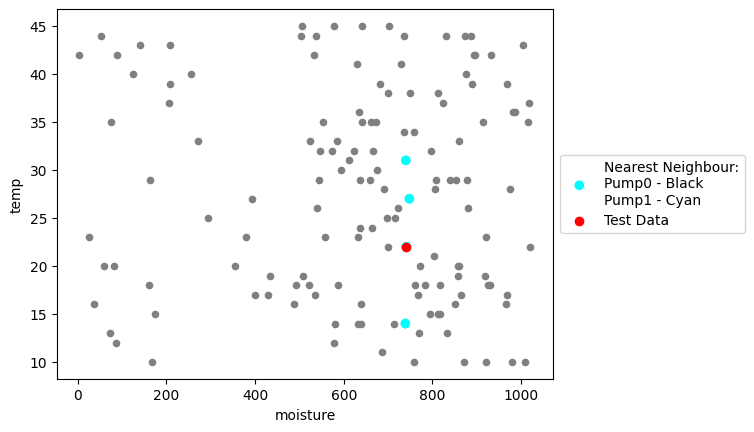

In [1425]:
# Visualization of the nearest neighbour process

# Adds a datapoint from the test dataframe to the training dataframe, which is to be used and evaluated
irrigation_table_30_0 = pd.Series(irrigation_table_30_test.iloc[0])
new_table = pd.concat([irrigation_table_70_train, irrigation_table_30_0.to_frame().T], ignore_index=True)

# List of euclidean distances
distances = []
# Iterates over the new dataframe, calculating the euclidean distance of each training datapoint and the test datapoint
for i in range(len(new_table)-1):
    distances.append([
      math.dist([new_table.iloc[-1]['moisture'], new_table.iloc[-1]['temp']], [new_table.iloc[i]['moisture'], new_table.iloc[i]['temp']]),
      new_table.iloc[i]['pump'].item(), i
    ])

# Sorts the distances list based on the euclidean distance values
distances = sorted(distances, key=lambda x: x[0])

test_list = [] # List that contains the test datapoint values
test_list.append(irrigation_table_30_0)

# Append the datapoint values of the k nearest neighbours
for i in range(3):
    test_list.append(pd.Series(new_table.iloc[distances[i][2]]))

# Create a dataframe based on the list of test datapoint and its k nearest neighbours
test_table = pd.DataFrame(test_list)

# Plots the training dataframe
irrigation_table_70_train.plot.scatter(x='moisture', y='temp', c='gray')

# Plots the k nearest neighbour datapoints; datapoint colors depend on classification
cmap_near = ListedColormap(['cyan', 'black'])
near = plt.pyplot.scatter(test_table.moisture, test_table.temp, c=test_table.pump, cmap=cmap_near)

# Plots the test datapoint
testdata = plt.pyplot.scatter(test_table.iloc[0].moisture, test_table.iloc[0].temp, c="red")

# Adds legend
plt.pyplot.legend((near, testdata),
           ('Nearest Neighbour:\nPump0 - Black\nPump1 - Cyan', 'Test Data'),
           scatterpoints=1,
           loc='center left', bbox_to_anchor=(1.0, 0.5))

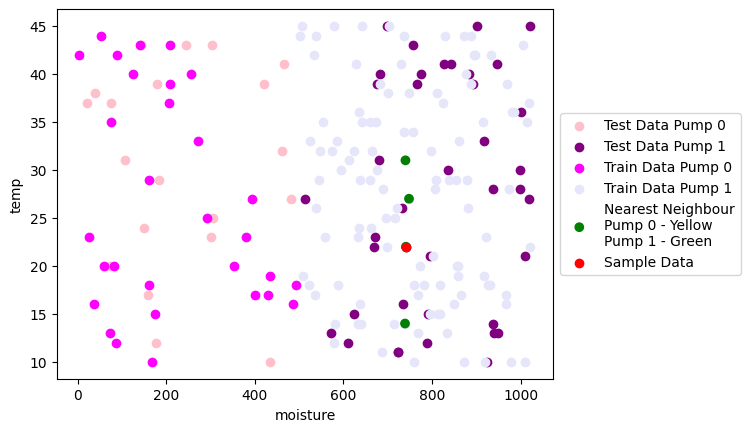

In [1426]:
# Segregate data values of both training dataframe and test dataframe based on the 2 distinct classifications
table_30_pump0 = irrigation_table_30_test[irrigation_table_30_test['pump'] == 0] # Dataframe for test datapoints with Pump 0 classification
table_70_pump0 = irrigation_table_70_train[irrigation_table_70_train['pump'] == 0] # Dataframe for training datapoints with Pump 0 classification
table_30_pump1 = irrigation_table_30_test[irrigation_table_30_test['pump'] == 1] # Dataframe for test datapoints with Pump 1 classification
table_70_pump1 = irrigation_table_70_train[irrigation_table_70_train['pump'] == 1] # Dataframe for training datapoints with Pump 1 classification

# Plots the irrigation table data frame
irrigation_table.plot.scatter(x='moisture', y='temp')

# Assigns different colors based on classification
table_30_pump0 = plt.pyplot.scatter(table_30_pump0.moisture, table_30_pump0.temp, c="pink")
table_70_pump0 = plt.pyplot.scatter(table_70_pump0.moisture, table_70_pump0.temp, c="magenta")
table_30_pump1 = plt.pyplot.scatter(table_30_pump1.moisture, table_30_pump1.temp, c="purple")
table_70_pump1 = plt.pyplot.scatter(table_70_pump1.moisture, table_70_pump1.temp, c="lavender")

# Plots the test datapoint and its k nearest neighbours
cmap_near = ListedColormap(['green', 'yellow'])
near = plt.pyplot.scatter(test_table.moisture, test_table.temp, c=test_table.pump, cmap=cmap_near)
testdata = plt.pyplot.scatter(test_table.iloc[0].moisture, test_table.iloc[0].temp, c="red")

# Adds legend
plt.pyplot.legend((table_30_pump0, table_30_pump1, table_70_pump0, table_70_pump1, near, testdata),
           ('Test Data Pump 0','Test Data Pump 1','Train Data Pump 0','Train Data Pump 1', 'Nearest Neighbour\nPump 0 - Yellow\nPump 1 - Green', 'Sample Data'),
           scatterpoints=1,
           loc='center left', 
           bbox_to_anchor=(1.0, 0.5))